# Vector Manipulation in Machine Translation

Machine Translation often involves the use of **word embeddings**, which are vector representations of words. These vectors capture semantic information about the words, and their manipulation plays a crucial role in Machine Translation.

## Techniques

1. **Vector Addition and Subtraction**: This is used to find semantic equivalents. For example, the result of the vector equation "King" - "Man" + "Woman" is close to "Queen".

2. **Cosine Similarity**: This measures the cosine of the angle between two vectors. It's used to determine how similar the meanings of two words are.

3. **Translation Matrix**: In cross-lingual tasks, a matrix is learned that can translate word vectors from one language to another.

In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

## Vector Addition and Subtraction

In the context of word embeddings, **vector addition and subtraction** can be used to find semantic equivalents. This is based on the principle that vectors in the embedding space capture the semantic relationships between words.

Consider the example of the vector equation "King" - "Man" + "Woman". The result of this equation is a vector that is close to the vector for "Queen". This demonstrates that the vector space has effectively captured the gender relationship between these words.

In [2]:
# Download the model if necessary
if not spacy.util.is_package("en_core_web_lg"):
    spacy.cli.download("en_core_web_lg")
    
# Load the model
nlp = spacy.load("en_core_web_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 8.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [3]:
# Get the vectors for "king", "man" and "woman"
king = nlp("king").vector
man = nlp("man").vector
woman = nlp("woman").vector

In [4]:
# Perform the calculation
result_vector = king - man + woman

In [5]:
# Find the closest vectors in the vocabulary to the result vector
similar_words = nlp.vocab.vectors.most_similar(
    result_vector.reshape(1, 300), n=20
)

In [6]:
for word in similar_words[0][0]:
    print(nlp.vocab.strings[word])

king
kings
princes
consort
princeling
monarch
princelings
princesses
prince
kingship
princess
ruler
consorts
kingi
princedom
rulers
kingii
enthronement
monarchical
queen


## Cosine Similarity

**Cosine similarity** is a measure of similarity between two non-zero vectors of an inner product space. It is defined to equal the cosine of the angle between them, which is also the same as the inner product of the same vectors normalized to both have length 1.

In the context of word embeddings, cosine similarity can be used to determine how similar the meanings of two words are. The cosine similarity is a number between -1 and 1. When the cosine similarity is close to 1, the angle between the vectors is small, which means the words are semantically similar.

Here's a Python code snippet demonstrating how to calculate cosine similarity:

In [7]:
def cosine_similarity(a, b):
    # Compute the dot product of véctors a and b
    dot_product = np.dot(a, b)
    
    # Compute the L2 norm of vector a
    norm_a = np.linalg.norm(a)
    
    # Compute the L2 norm of vector b
    norm_b = np.linalg.norm(b)
    
    # Compute the cosine similarity
    cosine_similarity = dot_product / (norm_a * norm_b)
    
    return cosine_similarity

In [8]:
# Define three vectors
vec1 = np.array([1, 0])  # Vector along x-axis
vec2 = np.array([0, 1])  # Vector along y-axis, cosine similarity with vec1 is 0
vec3 = np.array([-1, 0])  # Vector in opposite direction to vec1, cosine similarity with vec1 is -1
vec4 = np.array([1, 1])  # Vector at 45 degrees to vec1, cosine similarity with vec1 is > 0

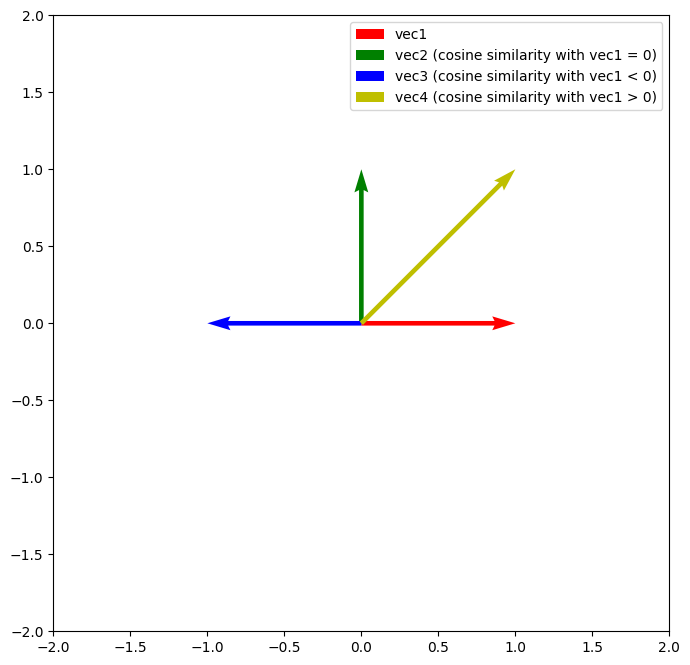

In [10]:
# Plot the vectors
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='r', label='vec1')
plt.quiver(0, 0, vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='g', label='vec2 (cosine similarity with vec1 = 0)')
plt.quiver(0, 0, vec3[0], vec3[1], angles='xy', scale_units='xy', scale=1, color='b', label='vec3 (cosine similarity with vec1 < 0)')
plt.quiver(0, 0, vec4[0], vec4[1], angles='xy', scale_units='xy', scale=1, color='y', label='vec4 (cosine similarity with vec1 > 0)')

# Set the x-limits and y-limits of the plot
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Add a legend
plt.legend()

plt.gca().set_aspect('equal', adjustable='box')

In [11]:
# Let's compute the cosine similarity between vec1 and vec2
print("Cosine similarity between vec1 and vec2:", cosine_similarity(vec1, vec2))

Cosine similarity between vec1 and vec2: 0.0


In [12]:
# Let's compute the cosine similarity between vec1 and vec3
print("Cosine similarity between vec1 and vec3:", cosine_similarity(vec1, vec3))

Cosine similarity between vec1 and vec3: -1.0


In [13]:
# Let's compute the cosine similarity between vec1 and vec4
print("Cosine similarity between vec1 and vec4:", cosine_similarity(vec1, vec4))

Cosine similarity between vec1 and vec4: 0.7071067811865475


## Translation Matrix

In cross-lingual tasks, a matrix, denoted as `W`, is learned that can translate word vectors from one language to another. This is known as a Translation Matrix.

The mathematical representation of this process is:

$$
W \cdot v_{\text{source}} = v_{\text{target}}
$$

where:

- $W$ is the translation matrix
- $v_{\text{source}}$ is the word vector in the source language
- $v_{\text{target}}$ is the word vector in the target language

The goal is to find a matrix `W` that minimizes the difference between the product of `W` and the source word vector, and the target word vector. This can be represented as:

$$
\min_W ||W \cdot v_{\text{source}} - v_{\text{target}}||
$$

This optimization problem can be solved using methods such as stochastic gradient descent.

In [14]:
x = np.array([1, 1])  # our vector
Ro = np.array([[2, 0], [0, -2]])  # our matrix

Next, we perform the dot product of the vector and the matrix. This will give us a new vector `y`.

In [15]:
y = np.dot(x, Ro)

In the plot, you will see that the output vector `y` is transformed into another vector.

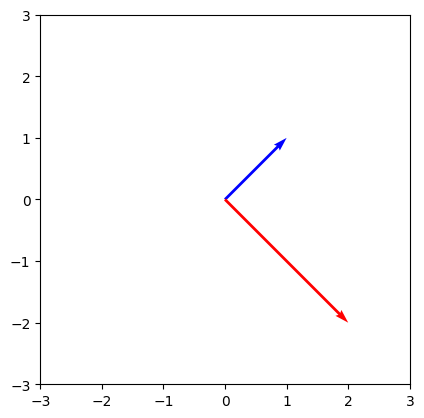

In [16]:
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', label='x')
plt.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color='r', label='y')
plt.gca().set_aspect('equal', adjustable='box')

If you perform the dot product with a rotation matrix, the resulting vector will be the original vector rotated by the specified angle.

Remember, the way a matrix modifies a vector during multiplication depends on the matrix. In this tutorial, we saw an example of a rotation matrix, but other types of matrices will modify vectors in different ways.

In [21]:
angle = 180 * (np.pi / 180)  # convert degrees to radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

y = np.dot(x, Ro)

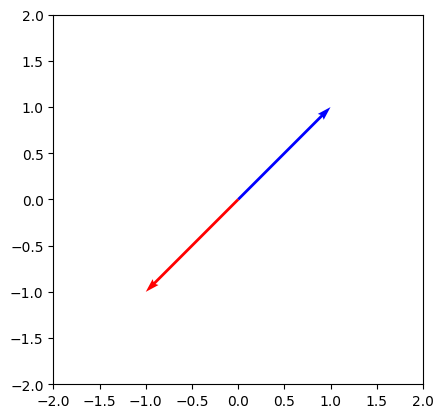

In [22]:
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', label='x')
plt.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color='r', label='y')
plt.gca().set_aspect('equal', adjustable='box')